# Assignment 4: NN

> Joshua Shell, Nathaniel Hernandez, Nicholas Malott


## 0. Initialization

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import cm
import pandas as pd 
import random
import math
from collections import Counter
# import pprint
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from numpy import log2 as log2
from pprint import pprint as pprint
import timeit

### Dataset Generation:

You will   be   generating your   own   dataset as follows: 
* For this   assignment we   will   be   using a  random two    feature  dataset
* Generate random 200 pairs (x1,    x2)   selected uniformly from   [-4 0,  40]   (python users: np.random.randint
* Assign them to  the   classes by  using   this rule
 * $𝑌 = −1 , 𝑥_1+ 3𝑥_2− 2 ≤ 0$
 * $𝑌 = 1  , 𝑥_1+ 3𝑥_2− 2 > 0$
* Thus, you will   have a two   feature and binary classification dataset. Save this    and    use   as the  dataset
* **NOTE: Make sure to have a balanced set of points between the positive and negative classes (~50%). You can keepgenerating random numbers until you meet this criterion**

In [ ]:
balanced = 2
setsize = 200

while balanced > 0.05: # up to 90 and 110 split
  x = np.random.randint(-40,40, size=(setsize, 2))
  y = np.ones((len(x),1))
  y[x[:,0] + 3*x[:,1] - 2 <= 0] = -1
  balanced = abs(np.mean(y))
  print(balanced)

dataset = np.concatenate((x, y), 1)
df = pd.DataFrame(dataset, columns = ['x1','x2','y'])
df.head(5)

0.02


,x1,x2,y
0,-32.0,-31.0,-1.0
1,38.0,37.0,1.0
2,9.0,5.0,1.0
3,7.0,30.0,1.0
4,-35.0,5.0,-1.0


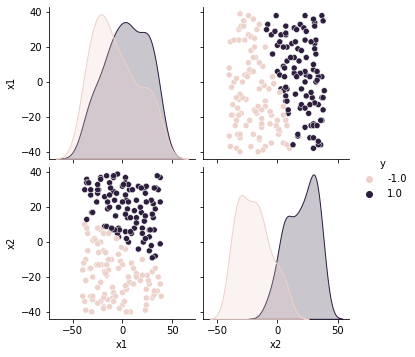

In [ ]:
import seaborn as sns
sns.pairplot(df,hue="y")
plt.show()

In [ ]:
def accuracy(pred, original):
  return np.mean(pred == original)

def activation(w, x):
  activation_val = x.dot(w)
  output = np.ones((len(x),1))
  output[activation_val < 0] = -1
  return output

def predict(w, x_test):
  return activation(w,x_test)

In [ ]:
# non-Stochastic
def deltaGD(X,Y,w,learn_rate,epochs):
  # allEr = np.zeros((epochs,1))
  allEr = []
  allW = []

  for epoch in range(epochs):
    #calculate the output vector
    prediction = activation(w,X)

    #calculate the derivative error
    dError = X.T.dot(Y - prediction)

    #update weights acccording to Delta rule
    w += learn_rate * dError
    allW.append(w)

    #append the error for this new w
    # allEr[epoch] = 1/2*sum((Y - activation(w,X))**2)
    allEr.append(1/2*sum((Y - activation(w,X))**2))

  return w, allW, allEr

accuracy:  1.0
weights:  [[ 0.73270316  8.65481163 23.92879388]]


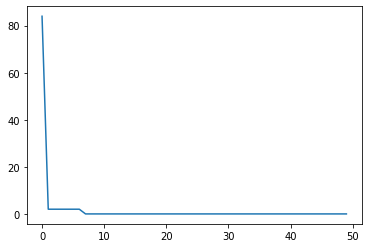

In [ ]:
# testing gradient
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

x_train = np.append(np.ones((len(x_train),1)), x_train, axis=1)
x_test = np.append(np.ones((len(x_test),1)), x_test, axis=1)
y_train = np.array(y_train)
y_test = np.array(y_test)

#Set up the weight vector (w), of dimension n+1, where n is number of attributes
# Randomly initialize w
# np.random.seed(0)
epochs = 50
learning_rate = 1e-2
w = np.random.rand(len(x_train[0]),1)
w, allW, allEr = deltaGD(x_train, y_train, w, learning_rate, epochs)

pred = predict(w,x_test)
print("accuracy: ", accuracy(pred,y_test))
print("weights: ", w.T)

plt.plot(range(epochs), allEr)

In [ ]:
# Stochastic
def deltaGDS(X,Y,w,learn_rate,epochs):
  allW = []
  allEr = []

  for epoch in range(epochs):
    # Pick a random point to use for GD
    ridx = np.random.randint(len(X)-1)

    #grab one row
    x = np.array([X[ridx]])
    y = Y[ridx]

    #calculate the output vector
    prediction = activation(w,x)

    #calculate the derivative error
    dError = x.T * (y - prediction)

    #update weights acccording to Delta rule
    w += learn_rate * dError
    allW.append(w)

    #append the error for this new w
    allEr.append(1/2*sum((Y - activation(w,X))**2))

  return w, allW, allEr

accuracy:  0.9242424242424242
weights:  [[0.84572883 0.84120189 1.12425725]]


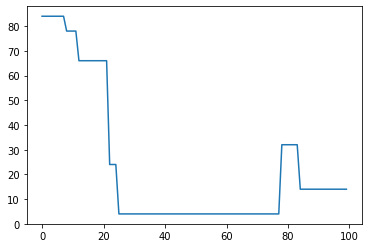

In [ ]:
# testing stochastic
epochs = 100
learning_rate = 1e-2
w = np.random.rand(len(x_train[0]),1)
w, allW, allEr = deltaGDS(x_train, y_train, w, learning_rate, epochs)

pred = predict(w,x_test)
print("accuracy: ", accuracy(pred,y_test))
print("weights: ", w.T)

plt.plot(range(epochs), allEr)

### Delta Training Plots

* (4 points)Plot    the  training error E  vs number of  training iterations/epochs (25   epochs)
* (4 points)Plot    the  decision    surface after 5, 10,   50,   100 iterations. Plot all the 4 as subplots in  one plot
* (4 points)Use different learning rates (0.1, 0.01, 0.001, 0.0001) and plot the training error E vs epochs (50 epochs). Plot the 4 as subplots in one plot. Briefly write up an analysis on which works better and explain why
* (8 points)Now implement delta rule in an incremental fashion (stochastic): as    opposed to  batch fashion when all    the dataare presented for training, the incremental approach updates the network after each example.Train for 50    epochs and pick the best learning rate according to  your analysis from (c)Compare the two approaches in  terms of total execution timeand number of   weight updates (use the timeitfrom pythonor tic-toc   from MATLAB).Report the results using the following template:


In [ ]:
############## Reinitialize Train/Test for safety ############## 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

x_train = np.append(np.ones((len(x_train),1)), x_train, axis=1)
x_test = np.append(np.ones((len(x_test),1)), x_test, axis=1)
y_train = np.array(y_train)
y_test = np.array(y_test)

def plotFunc(gs,title,xlabel=None,ylabel=None,xlim=None,ylim=None):
  ax = fig.add_subplot(gs)
  ax.set_title(title)
  ax.set_xlabel(xlabel)
  ax.set_ylabel(ylabel)
  ax.set_xlim(xlim)
  ax.set_ylim(ylim)
  return ax

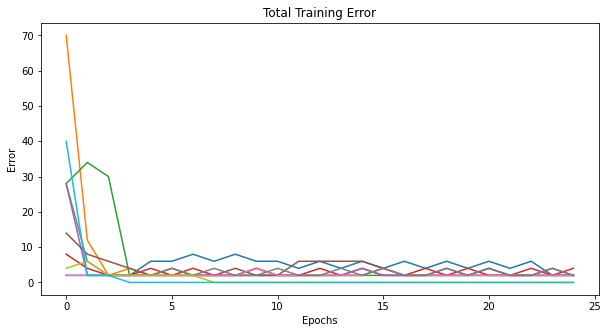

In [ ]:
############## Training Error v. Number of Training Iterations / epochs (25 epochs) ##############
# (4 points) Plot the training error E vs number of training iterations/epochs (25 epochs)

fig = plt.figure(figsize=(10,5))
gs = gridspec.GridSpec(1,1)
epochs = 25
learning_rate = 0.001 #0.01 or maybe 0.001 seems to be the best

ax = plotFunc(gs[0,0],'Total Training Error','Epochs','Error')
plt.autoscale(enable=True, axis='both', tight=False)

for i in range(10): #set to 1 or comment out when we're done playing
  w = np.random.rand(len(x_train[0]),1)
  w, allW, allEr = deltaGD(x_train, y_train, w, learning_rate, epochs)
  ax.plot(range(epochs), allEr)

# fig = plt.figure(figsize=(10,5))
# gs = gridspec.GridSpec(1,1)
# ax = plotFunc(gs[0,0],'Messing Around dError','Training Epochs','Derivative of Error for each weight')
# plt.autoscale(enable=True, axis='both', tight=True)
# allWArr = np.array(allW).reshape(epochs,-1)
# ax.plot(range(epochs), allWArr[:,2])

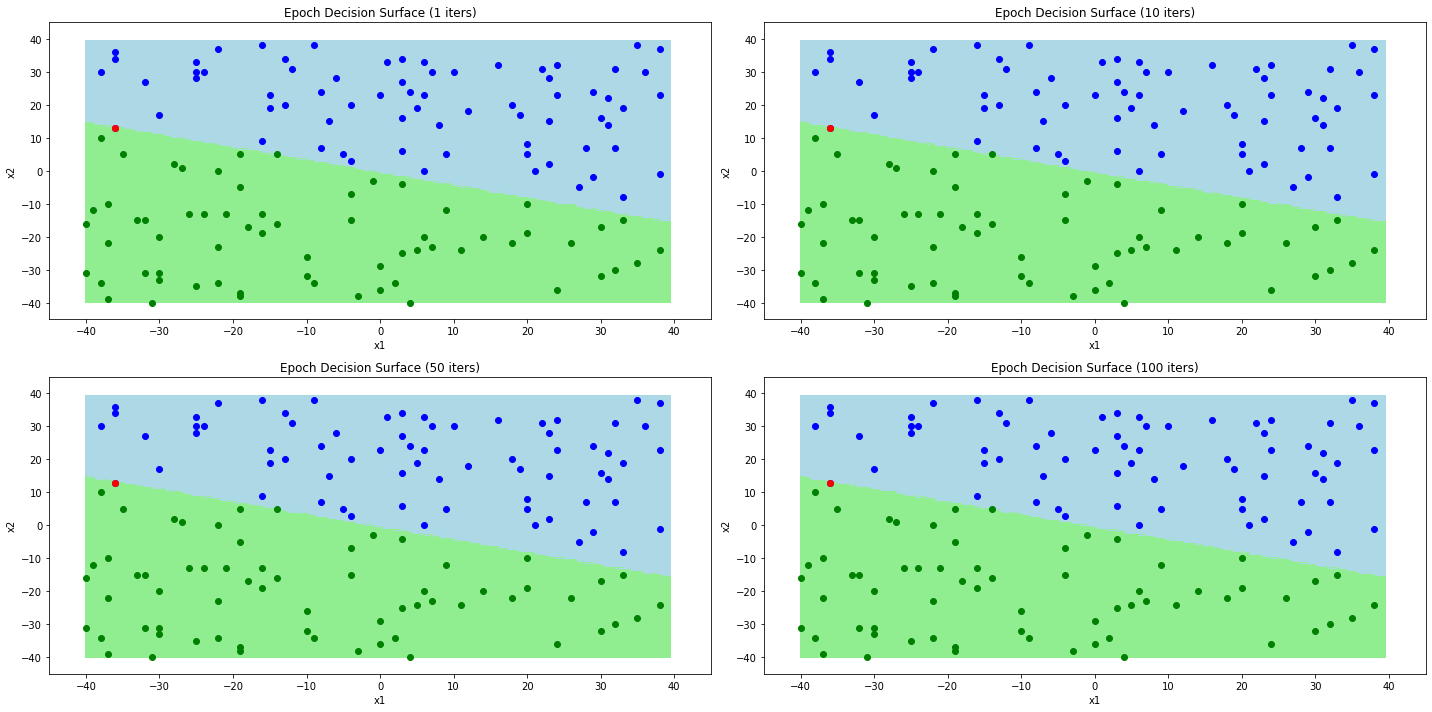

In [ ]:
############## Decision Surface after 5, 10, 50, 100 iterations ##############
# (4 points) Plot the decision surface after 5, 10, 50, 100 iterations. 
# Plot all the 4 as subplots in one plot

colors = ['blue','green']
fig = plt.figure(figsize=(20,10))
gs = gridspec.GridSpec(2,2)

#Create a datagrid for contour plot
samples = 0.5
x_grid = np.arange(-40, 40, samples)
y_grid = np.arange(-40, 40, samples)
data_grid = np.array([[i,j] for j in x_grid for i in y_grid])
data_grid = np.append(np.ones((len(data_grid),1)), data_grid, axis=1)

#Separate our positive and negative examples for plotting
idx = y_train == 1
idx = idx.reshape(x_train.shape[0])
pos_x = x_train[idx,:]
neg_x = x_train[~idx,:]

#Train the weights
np.random.seed(0)
w = np.random.rand(len(x_train[0]),1)
w, allW, allEr = deltaGD(x_train, y_train, w, 0.001, 100)

#pprint(np.array(allW).reshape(100,-1))

xlim = ylim = [-45, 45]
iterations = [5,10,50,100]
idx = 0
grids = [(0,0), (0,1), (1,0), (1,1)]

#Plot after some iterations
for iter in iterations:
  gdinx = grids[idx]
  title = 'Epoch Decision Surface (' + str(iter) + ' iters)'
  ax = plotFunc(gs[gdinx],title,'x1','x2',xlim,ylim)
  
  grid_pred = predict(allW[iter-1], data_grid)
  ax.contourf(x_grid, y_grid, grid_pred.reshape(y_grid.shape[0], x_grid.shape[0]),colors=['lightgreen','lightblue'])

  y_hat = predict(allW[iter-1], x_train)
  index = np.reshape(y_train != y_hat, x_train.shape[0])
  miss = x_train[index,:]

  ax.scatter(pos_x[:,1], pos_x[:,2], c='blue', label='Positive Examples')
  ax.scatter(neg_x[:,1], neg_x[:,2], c='green', label='Negative Examples')
  ax.scatter(miss[:,1], miss[:,2], c='red', label='Missed Examples')
  idx += 1

fig.tight_layout()
fig.show()

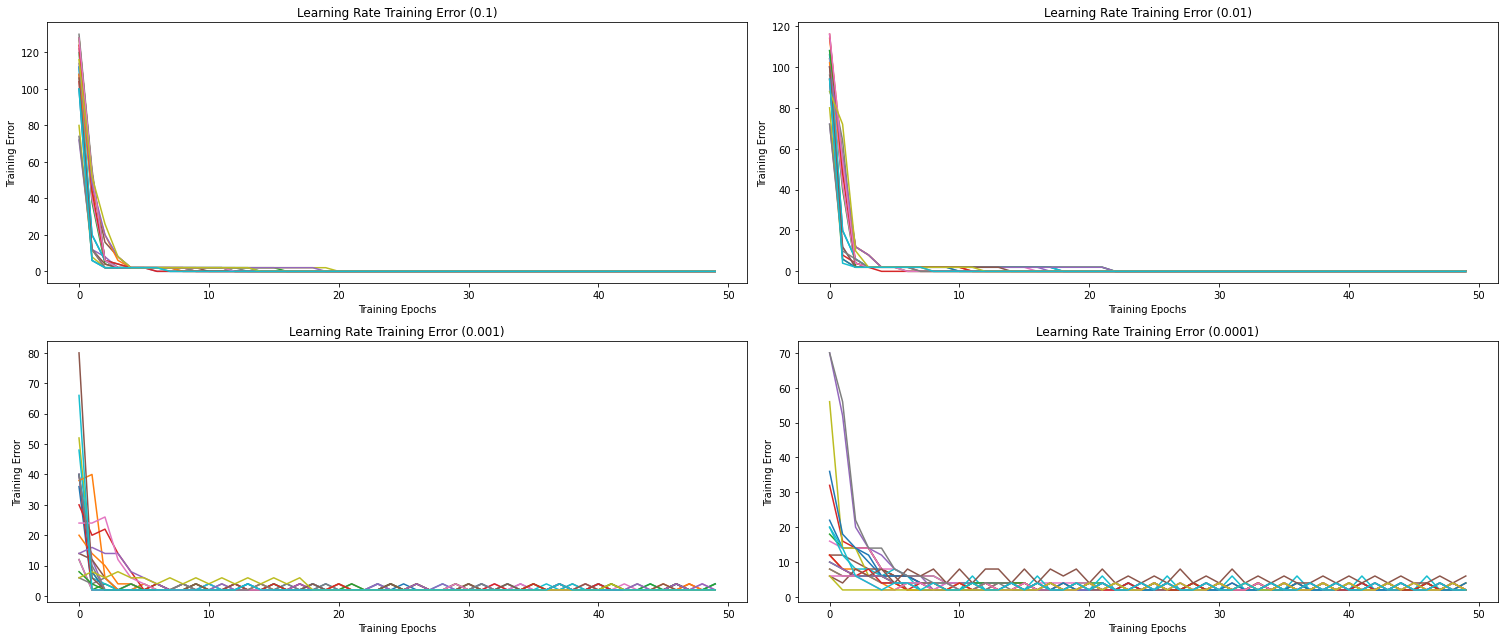

In [ ]:
############## Learning Rate Error v. Number of Training Iterations / epochs (50 epochs) ##############
# (4 points) Use different learning rates (0.1, 0.01, 0.001, 0.0001) and plot the training error E vs epochs (50 epochs). 
# Plot the 4 as subplots in one plot. Briefly write up an analysis on which works better and explain why

fig = plt.figure(figsize=(21,9))
gs = gridspec.GridSpec(2,2)

lrs = [1e-1, 1e-2, 1e-3, 1e-4]
epochs = 50

idx = 0
for idx in range(len(lrs)):
  gdinx = grids[idx]
  title = 'Learning Rate Training Error (' + str(lrs[idx]) + ')'
  ax = plotFunc(gs[gdinx],title,'Training Epochs','Training Error')
  plt.autoscale(enable=True, axis='both', tight=False)
  np.random.seed(0)

  for test in range(20):
    w = np.random.rand(len(x_train[0]),1)
    w, allW, allEr = deltaGD(x_train, y_train, w, lrs[idx], epochs)
    ax.plot(range(epochs), allEr)

  idx += 1

fig.tight_layout()

Epochs:  50
Learning Rate:  0.1

Stochastic Training:
	Execution Time:
CPU times: user 11.4 ms, sys: 81 µs, total: 11.5 ms
Wall time: 9.92 ms
	Num of Weight Updates: 50

Batch Training:
	Execution Time:
CPU times: user 14.6 ms, sys: 96 µs, total: 14.7 ms
Wall time: 14.1 ms
	Num of Weight Updates: 50


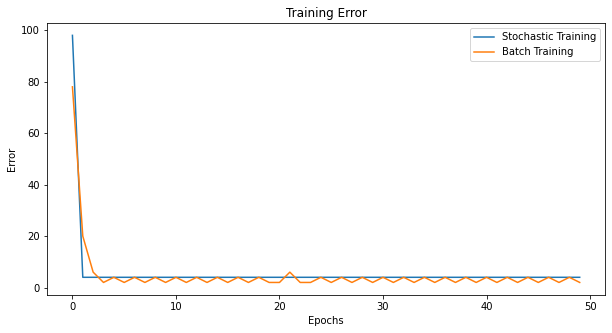

In [ ]:
############## Stochastic v. Batch Training / epochs (50 epochs) ##############
#(8 points) Now implement delta rule in an incremental fashion (stochastic): 
# as opposed to batch fashion when all the data are presented for training, the incremental approach updates the network after each example.
# Train for 50 epochs and pick the best learning rate according to your analysis from (c)
# Compare the two approaches in  terms of total execution timeand number of weight updates 
#   (use the timeitfrom python).

epochs = 50
learning_rate = 0.1

w_gradient = np.random.rand(len(x_train[0]),1)
w_stochastic = w_gradient.copy()

print('Epochs: ', epochs)
print('Learning Rate: ',learning_rate)
print('')

print('Stochastic Training:')
print('\tExecution Time:')
%time  wS, allWS, allErS = deltaGDS(x_train, y_train, w_stochastic, learning_rate, epochs)
print('\tNum of Weight Updates:',epochs)
print('')

print('Batch Training:')
print('\tExecution Time:')
%time wG, allWG, allErG = deltaGD(x_train, y_train, w_gradient, learning_rate, epochs)
print('\tNum of Weight Updates:',epochs)

fig = plt.figure(figsize=(10,5))
gs = gridspec.GridSpec(1,1)

ax = plotFunc(gs[0,0],'Training Error','Epochs','Error')
plt.autoscale(enable=True, axis='both', tight=False)

ax.plot(range(epochs), allErS, label='Stochastic Training')
ax.plot(range(epochs), allErG, label='Batch Training')
ax.legend()

## Problem 2

Consider now the same problem as above and implement variable learning rates as follows: 



(a) (10 points) **Decaying rates:** 
Start with a high learning rate η and decrease after each iteration multiplying it by a number in (0, 1), for example, 0.8, so that after one iteration, your new learning rate will be $0.8η$, after two iterations it will be $0.8^2η$, and after k iteration it will be $0.8^kη$. We know the tradeoff between the magnitude of the learning rate and speed of the algorithm: large rates tend to yield algorithms which are unstable, while small weights will result in slow algorithms. 

Now train for 25 epochs and plot the following: 
* Train error vs epochs (decaying rates) 
* Train error vs epochs (non-decaying/constant rates) 

NOTE: Both curves should be on the same plot. And both should have the same starting learning rate  Report your starting learning rate. Write up an analysis comparing your results and explain which works better and why. 

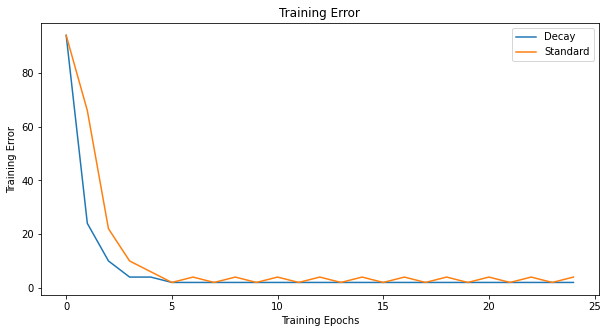

In [ ]:
############## Reinitialize Train/Test for safety ############## 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

x_train = np.append(np.ones((len(x_train),1)), x_train, axis=1)
x_test = np.append(np.ones((len(x_test),1)), x_test, axis=1)
y_train = np.array(y_train)
y_test = np.array(y_test)

############## Training Error v. Number of Training Iterations / epochs (25 epochs) ##############
fig = plt.figure(figsize=(10,5))
gs = gridspec.GridSpec(1,1)
epochs = 25
learning_rate = 0.01
decay_rate = 0.7

decay_error = []
standard_error = []

ax = plotFunc(gs[0,0],'Training Error','Training Epochs','Training Error')
plt.autoscale(enable=True, axis='both', tight=False)

w_decay = np.random.rand(len(x_train[0]),1)
w_standard = w_decay.copy()
lr_decay = learning_rate

for i in range(epochs): 
  w_decay, allW, allEr = deltaGD(x_train, y_train, w_decay, lr_decay, 1)
  decay_error.append(allEr[-1])
  lr_decay *= decay_rate

  w_standard, allW, allEr = deltaGD(x_train, y_train, w_standard, learning_rate, 1)
  standard_error.append(allEr[-1])

ax.plot(range(epochs), decay_error, label='Decay')
ax.plot(range(epochs), standard_error, label='Standard')
ax.legend()



(b) (20 points) **Adaptive rates:**
 Here the idea is to implement a procedure where the learning rate can increase or decrease as it may be needed. The idea is as follows: 
1. Start with an initial learning rate, say 0.3. Calculate the initial network output and error. 
2. Calculate new weights, biases, and the corresponding network output and error for each epoch using the current learning rate.
3. If the new error exceeds the previous error by a threshold t (which we decide in advance), then discard the calculated new weights and bias, and decrease the learning rate by multiplying it by a value d, in (0,1), preferably, close to 1. 
4. Otherwise, if the new error is smaller than the previous error, then the weights and biases are kept, and the learning rate is increased by multiplying it by a value D (slightly) larger than 1. 

Note: For example, starting with learning rate η=0.5, t=0.03, d=0.9, and D=1.02, a possible sequence of the learning rates could be η=0.5↓, 0.45↑, 0.4590↓, 0.4131↑, 0.4214↑, 0.4298↑, 0.4384↑ (note that I just generated these values w/o considering the actual errors and threshold t) 

Similar to (a) train for 25 epochs and plot the following: 

* Train error vs epochs (Adaptive rates) 
* Train error vs epochs (non-adaptive/constant rate) 


NOTE: Both curves should be on the same plot. And both should have the same starting learning rate  

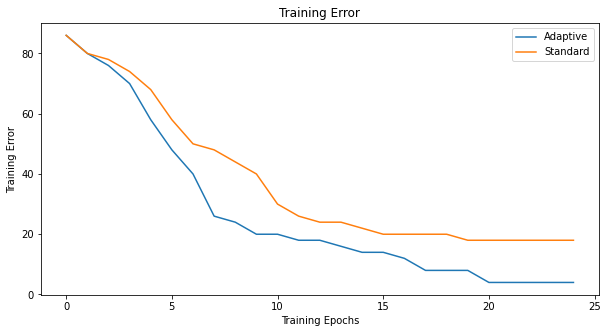

In [ ]:
############## Reinitialize Train/Test for safety ############## 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

x_train = np.append(np.ones((len(x_train),1)), x_train, axis=1)
x_test = np.append(np.ones((len(x_test),1)), x_test, axis=1)
y_train = np.array(y_train)
y_test = np.array(y_test)

############## Training Error v. Number of Training Iterations / epochs (25 epochs) ##############
fig = plt.figure(figsize=(10,5))
gs = gridspec.GridSpec(1,1)
epochs = 25
learning_rate = 0.00001
adaptive_D = 1.1
adaptive_d = 0.9
adaptive_threshold = 1

adaptive_error = []
standard_error = []

ax = plotFunc(gs[0,0],'Training Error','Training Epochs','Training Error')
plt.autoscale(enable=True, axis='both', tight=False)

w_adaptive = np.random.rand(len(x_train[0]),1)
w_standard = w_adaptive.copy()
lr_adaptive = learning_rate
last_err = 10000

for i in range(epochs): 
  w_standard, allW_standard, allEr_standard = deltaGD(x_train, y_train, w_standard, learning_rate, 1)
  standard_error.append(allEr_standard[-1])

  temp_w_adaptive, allW_adaptive, allEr_adaptive = deltaGD(x_train, y_train, w_adaptive, lr_adaptive, 1)
  adaptive_error.append(allEr_adaptive[-1])

  # print('Standard', allEr_standard[-1], learning_rate, '\tAdaptive', allEr_adaptive[-1], lr_adaptive)

  if(allEr_adaptive[-1] >= last_err + adaptive_threshold):
    lr_adaptive *= adaptive_d
  elif(allEr_adaptive[-1] < last_err):
    w_adaptive = temp_w_adaptive
    lr_adaptive *= adaptive_D
  else:
    w_adaptive = temp_w_adaptive

  last_err = allEr_adaptive[-1]


ax.plot(range(epochs), adaptive_error, label='Adaptive')
ax.plot(range(epochs), standard_error, label='Standard')
ax.legend()